# Proyecto Final Data Science 1_Leandra Jaramillo 
## Predicción precios de vivienda en una zona de EEUU

Con base en el Dataset obtenido a través de Kaggle de precios de casas en California en 1990, con este análisis se pretende realizar una predicción en los precios de venta que permitirá: 

1. Orientar frente al comportamiento que podria tener el consumidor que está en busqueda de viviendas en una zona determinada

2. Anticipar los espacios y características que deberán tener en cuenta futuros constructores para una mayor valoración del bien inmueble. 

**Este ejericio permitirá establecer**


* Cúales son las variables que más incidieron en los valores de los precios de vivienda en California durante la década de 1990

* Determinar si aspectos como el año de construcción, la valoración de calidad de la vivienda y distintas áreas de la casa influyen en el precio final. 

* Predecir según según las varibales que más influyen, el precio aproximado que podrá tener una vivienda en la zona. 



### Hipótesis: 

**El precio de las casas aumenta en relación al tamaño de su construcción**


Para crear el modelo **Se implementará un modelo de regresión lineal simple para realizar la predicción**

En este documento se desarrolla: 

* 1. Análisis exploratorio de los datos (EDA)
* 2. Modelo de predicción 
* 3. Conclusiones


## 1. Análisis exploratorio de los Datos EDA

In [14]:
##Importación de las librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

%matplotlib inline

In [15]:
##Importación del Data set
df_train = pd.read_csv("train.csv")

In [16]:
## N°dimensiones del Data Frame
df_train.shape

(1460, 81)

In [17]:
#Columnas que contiene el Data Set
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
## Visualización del DataSet
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
## Visualización de las características de los datos contenidos en el Dataframe
df_train.describe ()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
##Visualización del tipo de variables 
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [21]:
##Valor venta promedio
df_train["SalePrice"].mean()

180921.19589041095

In [22]:
## Estadísticas del Precio de venta

df_train ["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Visualización exploratoria

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

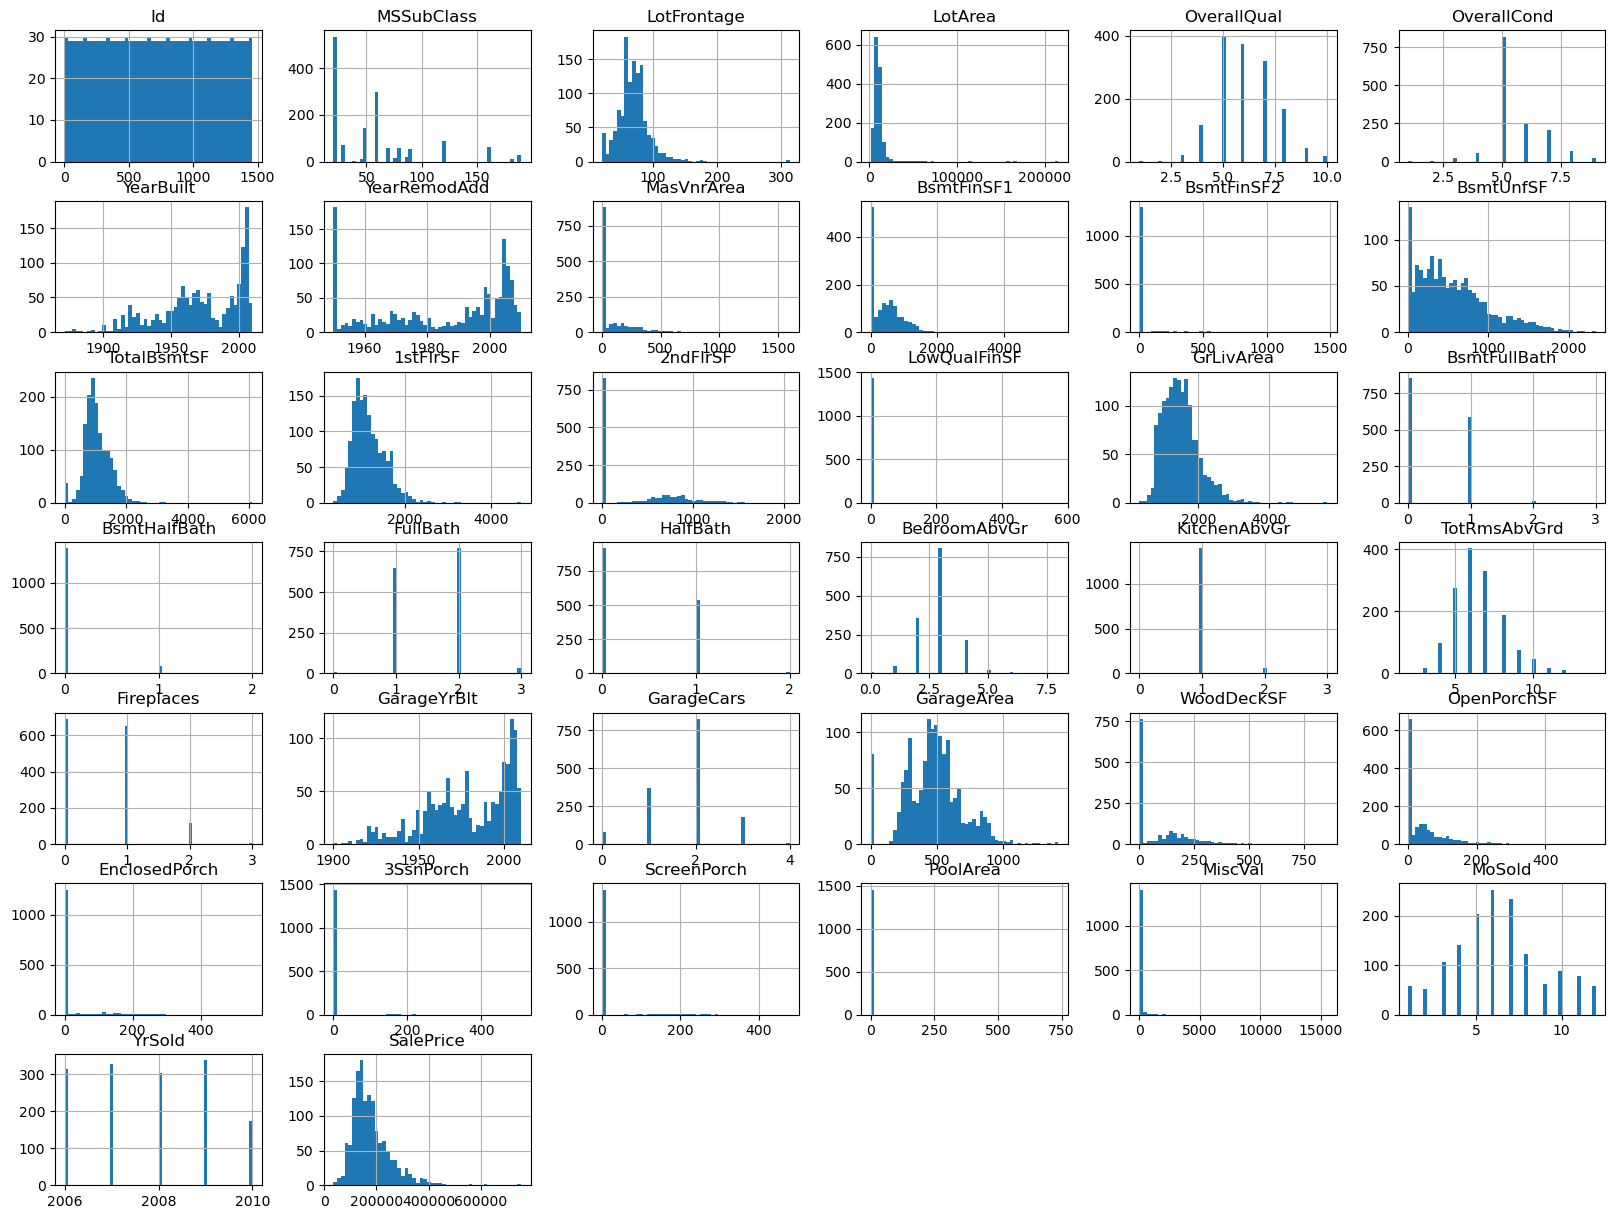

In [23]:
##Visualización de todas la variables numéricas
df_train.hist(bins=50, figsize=(20,15))

<Axes: xlabel='SalePrice', ylabel='Count'>

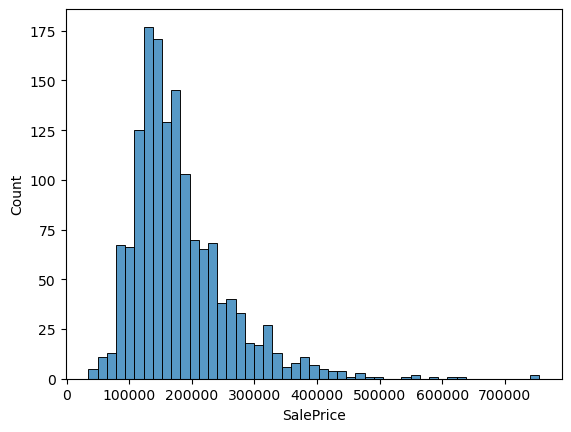

In [59]:
##TGráfica para visualizar las tendencias en los precios de las casas
sns.histplot(df_train["SalePrice"])

**Al no evidenciarse una tendencia marcada en los precios se calcula la inclinación y la curtosis**

In [25]:
df_train["SalePrice"].skew()

1.8828757597682129

In [26]:
df_train["SalePrice"].kurt()

6.536281860064529

Esto evidencia: 

* Se devía la distribución normal
* Tiene Skew positivo
* Muestra Peakedness

# Analizando relación entre variables

**1. Relación entre el precio de venta (SalePrice) y área habitable de la vivienda (GrLivArea)**

In [27]:
var = "GrLivArea"

In [28]:
data = pd.concat([df_train["SalePrice"],df_train[var]], axis=1)

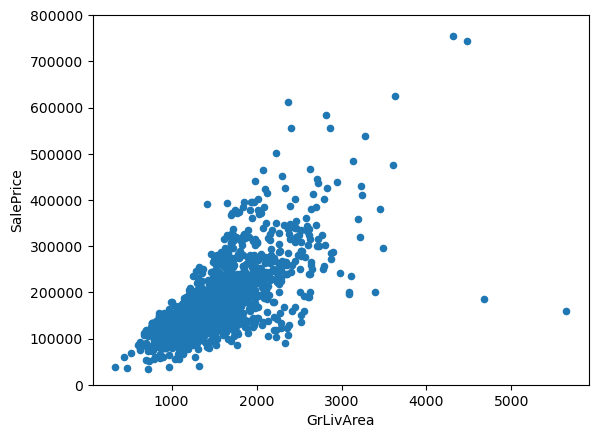

In [29]:
data.plot.scatter(x=var, y="SalePrice", ylim=(0,800000));

In [30]:
#Visualización de la gráfica con una línea recta
df_train['GrLivArea'].min()

334

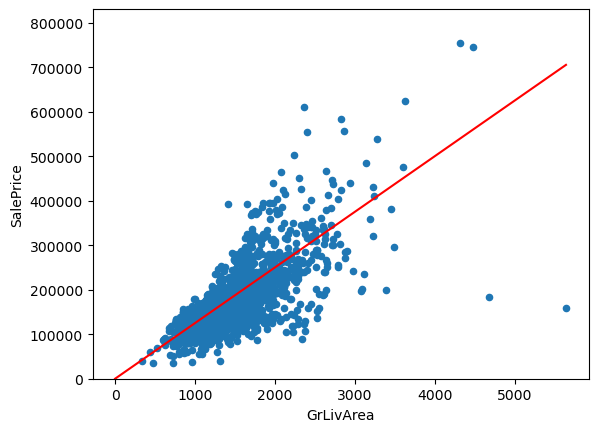

In [31]:
# parametros de la recta
w = 125
b = 0

# puntos de la recta
x = np.linspace(0,df_train['GrLivArea'].max(),100)
y = w*x+b

# grafica de la recta
df_train.plot.scatter(x='GrLivArea',y='SalePrice')
plt.plot(x, y, '-r')
plt.ylim(0,df_train['SalePrice'].max()*1.1)
# plt.grid()
plt.show()

**El gráfico muestra una relación entre las dos variables analizadas: mientras mayor es el área habitable, mayor es el precio de venta**

**2.Relación entre precio de venta (SalePrice) y área del sótano (TotalBsmtSF)**

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

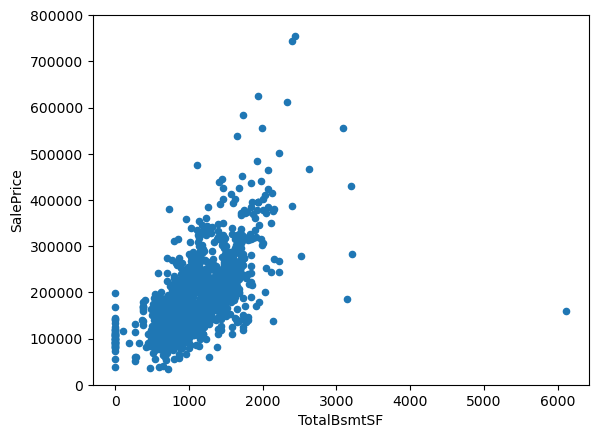

In [32]:
var = "TotalBsmtSF"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0,800000))

**La visualización muestra que si bien si existe una relación entre las dos variables analizadas no es tan marcada como se evidencia en el anterior gráfico**


**3.Relación entre Precio de venta (SalePrice) Calidad de la casa (OverallQual)**

In [33]:
var = "OverallQual"

In [34]:
data = pd.concat([df_train["SalePrice"],df_train[var]], axis=1)

(-0.5, 9.5, 0.0, 800000.0)

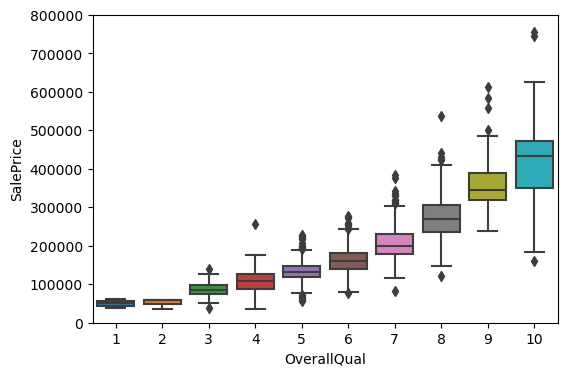

In [35]:
f, ax = plt.subplots(figsize=(6,4))
fig = sns.boxplot(x=var, y="SalePrice", data = data)
fig.axis(ymin=0,ymax=800000)

**Esta gráfica nos muestra como la calidad tiene una fuerte incidencia en el precio de la casa. A mayor grado de calidad otorgado a la casa mayor es el precio de venta. También evidencia que a mayor calidad, mayor disparidad en los precios**

## Visualización de Correlaciones 

**Matriz de correlación**

In [36]:
corrmat = df_train.corr(numeric_only=True)

<Axes: >

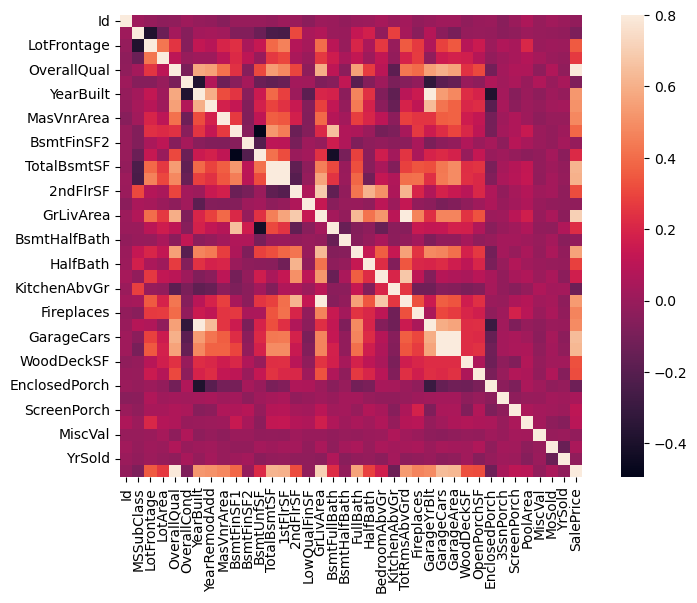

In [37]:
f, ax =plt.subplots(figsize=(10,6))
sns.heatmap(corrmat, vmax=.8, square = True)

**variables con mayor correlación al precio de venta:**




In [38]:
k = 10

In [39]:
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index

In [40]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [41]:
cm = np.corrcoef(df_train[cols].values.T)

In [75]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

In [42]:
sns.set(font_scale=1.25)

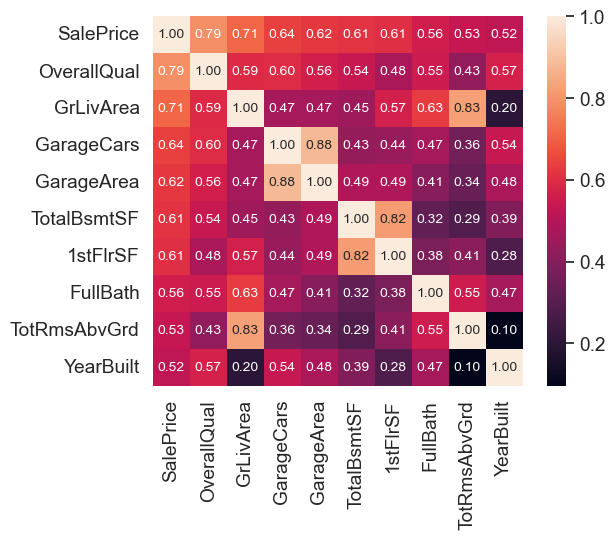

In [43]:
hm = sns.heatmap(cm, cbar=True, annot=True, square = True, fmt=".2f", annot_kws={"size":10,}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**En este mapa de calor, con base en la matriz de correlación se puede evidenciar:**

* Las variables Area de la vivienda, área sótano y calidad de la construcción están muy fuertemente correlacionadas con el precio de venta
* Las variables de garage están correlacionadas
* Sótano y 1 piso están correlacionadas
* Año de construcción de la vivienda está levemente correlacionada con el precio de venta


## 2. Modelo de predicción

**Preparación de los datos y creación del modelo**

In [4]:
df_train["GrLivArea"]

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [95]:
df_train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [44]:
# calculo de las predicciones
df_train['pred'] = df_train['GrLivArea']*w+b

# calculo de la funcion de error (ECM)
df_train['diff'] = df_train['pred']-df_train['SalePrice']
df_train['cuad'] = df_train['diff']**2
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,213750,5250,27562500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,157750,-23750,564062500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,223250,-250,62500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,214625,74625,5568890625
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,274750,24750,612562500


In [45]:
df_train['cuad'].mean()

3300407822.406164

In [46]:
# grid de la funcion de error basado en m, b=0
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [47]:
def sum_error(w, df_train):
    b=0
    df_train['pred'] = df_train['GrLivArea']*w+b
    df_train['diff'] = df_train['pred']-df_train['SalePrice']
    df_train['cuad'] = df_train['diff']**2
    return(df_train['cuad'].mean())

In [48]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, df_train=df_train))
grid_error.head()

,w,error
0,50.000000,1.509658e+10
1,53.061224,1.404857e+10
2,56.122449,1.304878e+10
3,59.183673,1.209720e+10
4,62.244898,1.119384e+10


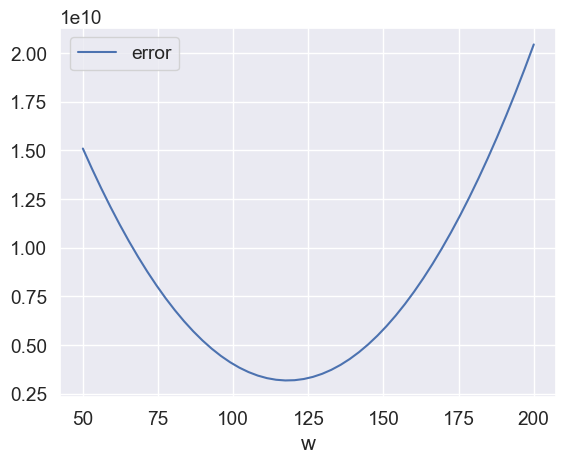

In [49]:
grid_error.plot(x='w',y='error')
plt.show()

**El valor mínimo es 118**

In [51]:
# usando sklear para saber los valores optimos
from sklearn.linear_model import LinearRegression

# definiendo input y output
X_df_train = np.array(df_train['GrLivArea']).reshape((-1, 1)) #variable independiente
Y_df_train = np.array(df_train['SalePrice'])                  #Variable target

# creando modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_df_train, Y_df_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

# Predecir valores para nuevos datos

nuevo_dato = np.array([[1200]])

prediccion = model.predict(nuevo_dato)

print("Prediccion para x=1200:", prediccion)

intercepto (b): 0.0
pendiente (w): [118.06909986]
Prediccion para x=1200: [141682.91983572]


## 3. Conclusiones

Se valida la hipótesis: **El precio de las casas aumenta en relación al tamaño de su construcción** a mayor tamaño en el área de construcción mayor será el precio de venta. 

Pero además el estudio permite identificar que : 

* El precio de las casas aumenta en proporción a su año de fabricación: Menor tiempo de construcción mayor precio
* El precio de las casas aumenta en relación a la calidad de la construcción
* El precio de las casa aumenta en relación a diferentes espacios que puedan tener (Sótano, n° de parqueaderos, n° de habitaciones) 

Si bien, este primer acercamiento se ha realizado con un modelo supervisado de **Regresión lineal simple** se recomienda utilizar un modelo de regresión múltiple para tener en cuenta en el modelo de predicción las otras variables que influyen en el precio de venta y de esta manera desarrollar un mejor modelo predictivo. 
    